In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

In [19]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0 Safari/537.36"
}
resp = requests.get(url, headers=headers)
resp.raise_for_status()

soup = BeautifulSoup(resp.content, "html.parser")
table = soup.find("table", {"class": "wikitable"})

# Extract headers
header_row = [th.get_text(strip=True) for th in table.find_all("tr")[0].find_all("th")]

# Extract data
rows = table.find_all("tr")[1:]
data = []
for row in rows:
    cells = row.find_all("td")
    if not cells:
        continue
    data.append([cell.get_text(strip=True) for cell in cells])

# Create DataFrame
df = pd.DataFrame(data, columns=header_row)

# ✅ Now you can drop the "Details" column (if it exists)
if "Details" in df.columns:
    df = df.drop("Details", axis=1)

pd.set_option("display.max_colwidth", 30)
print(df.head(3))
df.to_csv("web_scrapping.csv", index=False, encoding="utf-8")


               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973           Mountjoy Jail,Dublin        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David KaplanCarlos An...  
1  JB O'HaganSeamus TwomeyKev...  
2  Garrett Brock TrapnellMart...  


In [3]:
# Show available columns
print("Columns in DataFrame:", df.columns.tolist())

# Drop Details column only if it exists
if "Details" in df.columns:
    df = df.drop("Details", axis=1)

# Make columns easier to read
pd.set_option("display.max_colwidth", 30)

# Preview first 3 rows
print(df.head(3))


Columns in DataFrame: ['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)']
               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973           Mountjoy Jail,Dublin        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David KaplanCarlos An...  
1  JB O'HaganSeamus TwomeyKev...  
2  Garrett Brock TrapnellMart...  


In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and count the number of escapes in each year
escapes_per_year = df.groupby('Year').size()

# Print the number of prison escapes per year
print("Prison Escapes per Year:")
print(escapes_per_year)

Prison Escapes per Year:
Year
1971.0    1
1973.0    1
1978.0    1
1981.0    2
1985.0    2
1986.0    3
1987.0    1
1988.0    3
1989.0    2
1990.0    1
1991.0    1
1992.0    1
1993.0    1
1996.0    1
1997.0    1
1999.0    1
2000.0    2
2001.0    3
2002.0    2
2003.0    1
2005.0    1
2006.0    1
2007.0    3
2009.0    3
2010.0    1
2012.0    1
2013.0    2
2014.0    1
2016.0    1
2018.0    1
2020.0    1
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_12292\3171940589.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


<Axes: title={'center': 'Prison Escapes per Year'}, xlabel='Year', ylabel='Number of Escapes'>

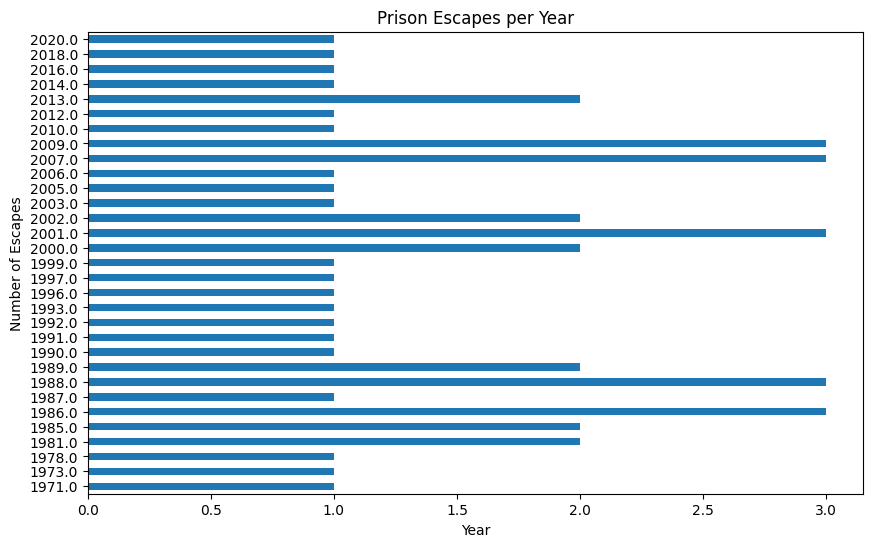

In [5]:
# Plotting the number of prison escapes per year
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and day of the week from the 'Date' column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group the data by month and count the number of escapes in each month
escapes_per_month = df.groupby('Month').size()

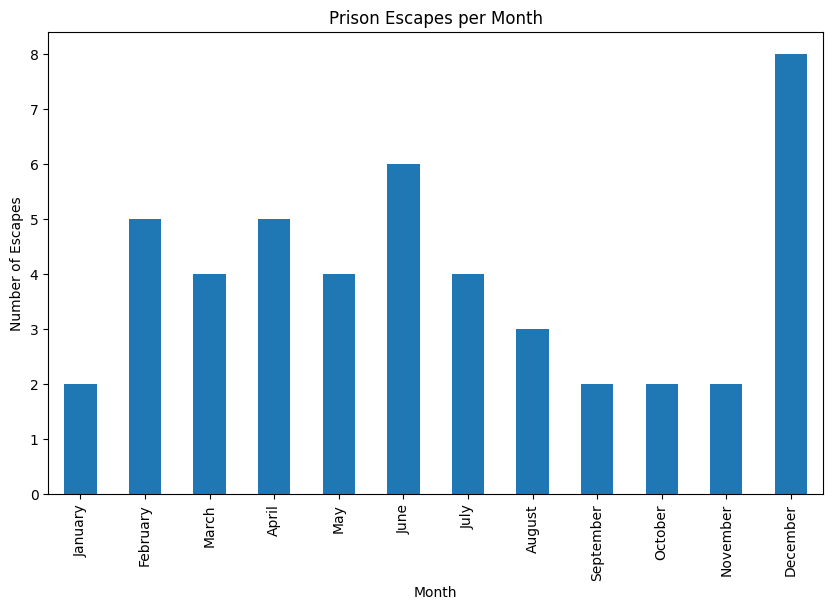

In [7]:
# Plot the number of prison escapes per month
escapes_per_month = escapes_per_month.rename(index=month_names)  # Rename month numbers to month names
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')


# Create a list to map day of the week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by day of the week and count the number of escapes on each day
escapes_per_day = df.groupby('DayOfWeek').size()

# Show the plots
plt.show()

<Axes: title={'center': 'Prison Escapes per Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Escapes'>

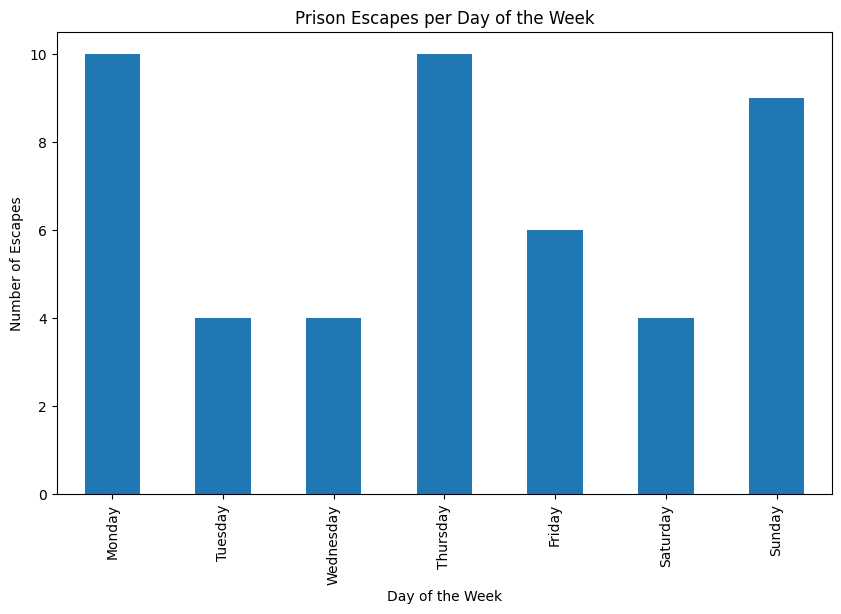

In [8]:
# Plot the number of prison escapes per day of the week
escapes_per_day.index = day_names  # Rename day of the week numbers to day names
escapes_per_day.plot(kind='bar', figsize=(10, 6), xlabel='Day of the Week', ylabel='Number of Escapes',
                     title='Prison Escapes per Day of the Week')

In [9]:
# Group the data by country and count the number of escapes in each country
escapes_per_country = df.groupby('Country').size()

# Sort the countries based on the number of escapes in descending order
top_countries = escapes_per_country.sort_values(ascending=False)

# Print the top countries with the highest number of recorded prison escapes
print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))


Countries with the Highest Number of Recorded Prison Escapes:
Country
France            15
United States      8
Greece             4
Belgium            4
Canada             4
Brazil             2
Colombia           2
Australia          2
United Kingdom     2
Chile              1
dtype: int64


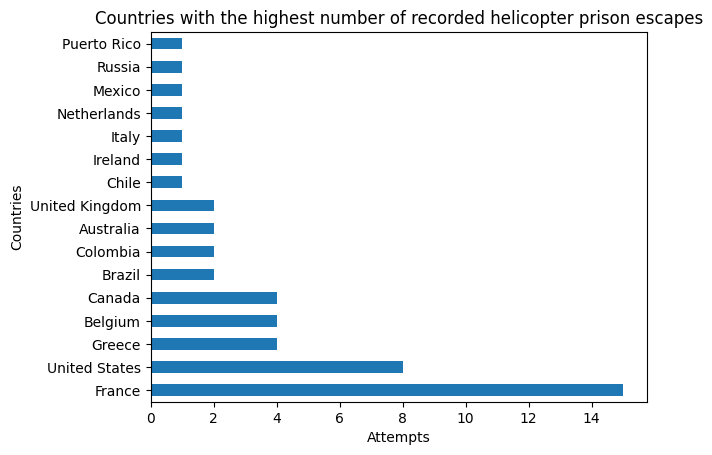

In [10]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

In [11]:
# Count successes and failures
success = df['Succeeded'].value_counts().get('Yes', 0)
failure = df['Succeeded'].value_counts().get('No', 0)

# Total attempts
total = success + failure

# Percentages
success_percentage = (success / total) * 100
failure_percentage = (failure / total) * 100

print(f"Total: {total}")
print(f"Success: {success} ({success_percentage:.2f}%)")
print(f"Failure: {failure} ({failure_percentage:.2f}%)")


Total: 50
Success: 36 (72.00%)
Failure: 14 (28.00%)


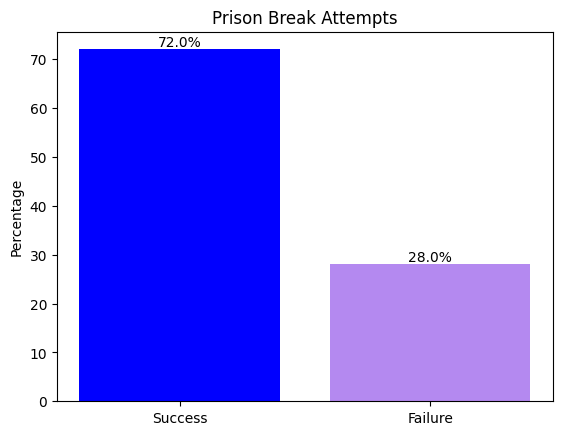

In [20]:
import matplotlib.pyplot as plt

# Assuming you have the success_percentage and failure_percentage calculated

# Create bar chart
labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['blue', "#B489F0"]

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

# Add data labels to the bars
for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

# Display the chart
plt.show()

In [13]:
# Calculate the average number of escapees per incident
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()

# Print the average number of escapees per incident
print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")


Average Number of Escapees per Incident:
1.02


In [14]:
# Filter the DataFrame to include only rows where 'Escapee(s)' is not empty
escaped_individuals = df[df['Escapee(s)'].notnull()]

# Split the 'Escapee(s)' column to get individual escapees
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')

# Create a list to store individuals who attempted helicopter prison escapes
all_escapees = []

# Iterate over the individual_escapees list and add escapees to the all_escapees list
for escapees in individual_escapees:
    all_escapees.extend(escapees)

# Create a DataFrame to count the occurrences of each escapee
escapee_counts = pd.Series(all_escapees).value_counts()

# Filter the escapee_counts DataFrame to select escapees who attempted multiple escapes
persistent_escapees = escapee_counts[escapee_counts > 1]

# Print the persistent escapees who attempted helicopter prison escapes multiple times
print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)

Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 8
Michel Vaujour    2
Pascal Payet      2
Name: count, dtype: int64


In [15]:
# 1. Set the maximum column width for better display
pd.set_option('display.max_colwidth', 23)

# 2. Drop rows with NaN values in the 'Escapee(s)' column
temporary_df = df.dropna(subset=['Escapee(s)'])

# 3. Find escapees that appear more than once
escapee_counts = temporary_df['Escapee(s)'].value_counts()
repeated_escapees = escapee_counts[escapee_counts > 1].index.tolist()

print("Repeated escapees found:", repeated_escapees)

# 4. Define the desired column order (adjust column names if needed)
print("Columns in df:", df.columns.tolist())  # 👈 helps you confirm exact names
column_order = ['Escapee(s)', 'Succeeded', 'Prison', 'Date', 'Country']
# (use 'Prison' instead of 'Prison name' if that's what df actually has)

# 5. Filter rows where Escapee(s) is in repeated_escapees
duplicated_df = temporary_df[temporary_df['Escapee(s)'].isin(repeated_escapees)]

# 6. Reorder columns
duplicated_df = duplicated_df.reindex(columns=column_order)

print("The Unstoppable: Recurrent Escapees")
print(duplicated_df)


Repeated escapees found: ['—', 'Pascal Payet', 'Michel Vaujour']
Columns in df: ['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Year', 'Month', 'DayOfWeek']
The Unstoppable: Recurrent Escapees
        Escapee(s) Succeeded  Prison       Date      Country
8   Michel Vaujour       Yes     NaN 1986-05-26       France
14               —       Yes     NaN 1988-12-23     Colombia
19               —       Yes     NaN 1992-02-24       France
20               —        No     NaN        NaT       France
21  Michel Vaujour        No     NaN 1993-06-17       France
23               —        No     NaN 1997-09-18  Netherlands
26               —       Yes     NaN 2000-12-13       France
27    Pascal Payet       Yes     NaN 2001-01-19       France
29               —        No     NaN 2001-05-28       France
30               —       Yes     NaN 2002-01-17       Brazil
33               —        No     NaN        NaT       France
37    Pascal Payet       Yes     NaN 2007-07-15       France

In [16]:
print(df.columns)


Index(['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Year',
       'Month', 'DayOfWeek'],
      dtype='object')


In [17]:
print(df.columns.tolist())


['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Year', 'Month', 'DayOfWeek']


In [18]:
df

,Date,Prison name,Country,Succeeded,Escapee(s),Year,Month,DayOfWeek
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David KaplanCa...,1971.0,8.0,3.0
1,1973-10-31,"Mountjoy Jail,Dublin",Ireland,Yes,JB O'HaganSeamus Tw...,1973.0,10.0,2.0
2,1978-05-24,United States Penit...,United States,No,Garrett Brock Trapn...,1978.0,5.0,2.0
3,1981-02-27,"Fleury-Mérogis,Esso...",France,Yes,Gérard DupréDaniel ...,1981.0,2.0,4.0
4,1981-05-07,"Orsainville Prison,...",Canada,No,Marina Paquet (hija...,1981.0,5.0,3.0
5,NaT,Pentridge (HM Prison),Australia,No,David McMillan,NaN,NaN,NaN
6,1985-12-19,Perry Correctional ...,United States,Yes,James Rodney Leonar...,1985.0,12.0,3.0
7,1985-12-31,Cândido Mendes peni...,Brazil,Yes,José Carlos dos Rei...,1985.0,12.0,1.0
8,1986-05-26,Prison de la Santé,France,Yes,Michel Vaujour,1986.0,5.0,0.0
9,1986-11-05,Federal Correctiona...,United States,Yes,Samantha Lopez,1986.0,11.0,2.0
